<a href="https://colab.research.google.com/github/SehanArandara/DL-Assignment-SLIIT-2024/blob/yasiru_v2/yyasiru.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install opendatasets


In [ ]:
# Import packages
import pandas as pd
import opendatasets as od
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
od.download('https://www.kaggle.com/datasets/erdemtaha/cancer-data/data')

Skipping, found downloaded files in "./cancer-data" (use force=True to force download)


In [ ]:
# import the CSV

data = pd.read_csv('/content/cancer-data/Cancer_Data.csv')
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


## Data Preproccesing       .


In [ ]:
# check the column with null values
data.isna().sum()

,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0


In [ ]:
# Encode the label of the Y - one hot encoding for categorical values
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['diagnosis'] = le.fit_transform(data['diagnosis'])

In [ ]:
# remove column with null values and id
data.drop(['id','Unnamed: 32'],axis=1,inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [ ]:
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
# check the values are encoded correctly
data['diagnosis'].value_counts()

,count
diagnosis,
0,357
1,212


## Feature Selecting using the mutual information approach

- I am going to use the SelectKBest so I have to find the best K value
- For that i am going to use the Cross Validation

In [ ]:
# define the X and Y
X = data.drop('diagnosis',axis=1)
y = data['diagnosis']

X.shape , y.shape ,data.shape


((569, 30), (569,), (569, 31))

In [ ]:
# Feature Selecting using the Mutual information
from sklearn.feature_selection import mutual_info_classif
mutual_info = mutual_info_classif(X,y)
mutual_info

array([0.36594209, 0.09991673, 0.40340312, 0.35820712, 0.07595162,
       0.21178588, 0.37476958, 0.43918202, 0.0682794 , 0.00848906,
       0.24821665, 0.00223691, 0.27321633, 0.34006151, 0.01409262,
       0.0743688 , 0.11762498, 0.12869878, 0.01547209, 0.04054995,
       0.45390805, 0.12413576, 0.47615279, 0.46387392, 0.0993994 ,
       0.22673073, 0.31499577, 0.43792698, 0.09295389, 0.06647319])

Index(['perimeter_worst', 'area_worst', 'radius_worst', 'concave points_mean',
       'concave points_worst', 'perimeter_mean', 'concavity_mean',
       'radius_mean', 'area_mean', 'area_se'],
      dtype='object')

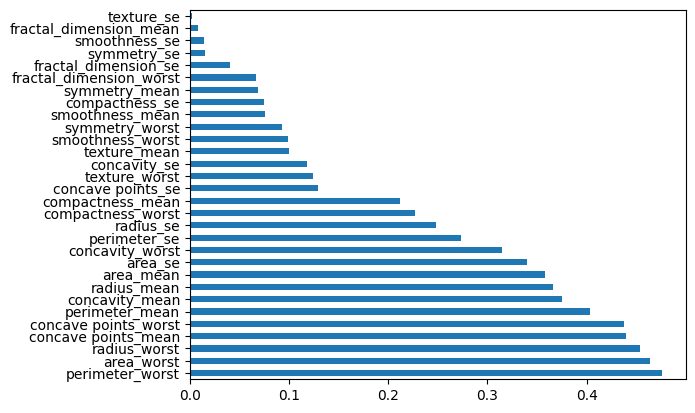

In [ ]:
mutual_info = pd.Series(mutual_info, index=X.columns)
mutual_info_sorted = mutual_info.sort_values(ascending=False)

mutual_info_sorted.plot.barh()


top_n_features = mutual_info_sorted.head(10).index
top_n_features


In [ ]:
X_best_features = X[top_n_features]
X_best_features.shape
X_best_features.head()

,perimeter_worst,area_worst,radius_worst,concave points_mean,concave points_worst,perimeter_mean,concavity_mean,radius_mean,area_mean,area_se
0,184.60,2019.0,25.38,0.14710,0.2654,122.80,0.3001,17.99,1001.0,153.40
1,158.80,1956.0,24.99,0.07017,0.1860,132.90,0.0869,20.57,1326.0,74.08
2,152.50,1709.0,23.57,0.12790,0.2430,130.00,0.1974,19.69,1203.0,94.03
3,98.87,567.7,14.91,0.10520,0.2575,77.58,0.2414,11.42,386.1,27.23
4,152.20,1575.0,22.54,0.10430,0.1625,135.10,0.1980,20.29,1297.0,94.44


In [ ]:
X[top_n_features].head()

,perimeter_worst,area_worst,radius_worst,concave points_mean,concave points_worst,perimeter_mean,concavity_mean,radius_mean,area_mean,area_se
0,184.60,2019.0,25.38,0.14710,0.2654,122.80,0.3001,17.99,1001.0,153.40
1,158.80,1956.0,24.99,0.07017,0.1860,132.90,0.0869,20.57,1326.0,74.08
2,152.50,1709.0,23.57,0.12790,0.2430,130.00,0.1974,19.69,1203.0,94.03
3,98.87,567.7,14.91,0.10520,0.2575,77.58,0.2414,11.42,386.1,27.23
4,152.20,1575.0,22.54,0.10430,0.1625,135.10,0.1980,20.29,1297.0,94.44


## Split the data set

In [ ]:
# split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_best_features, y, test_size=0.2, random_state=42)

X_train.shape , X_test.shape , y_train.shape , y_test.shape , data.shape    # All the data are presented

((455, 10), (114, 10), (455,), (114,), (569, 31))

## Setting the model architecture



In [ ]:
from tensorflow.keras import layers, models

In [ ]:
# Input layer
inputs = layers.Input(shape=(X_train.shape[1],))

# First Dense layer with BatchNormalization, Activation, and Dropout
x = layers.Dense(128, kernel_initializer='he_normal')(inputs)
x = layers.BatchNormalization()(x)
x = layers.Activation('relu')(x)
x = layers.Dropout(0.3)(x)

# # Second Dense layer
# x = layers.Dense(64, kernel_initializer='he_normal')(x)
# x = layers.BatchNormalization()(x)
# x = layers.Activation('relu')(x)
# x = layers.Dropout(0.3)(x)

# Output layer for binary classification (using sigmoid)
outputs = layers.Dense(1, activation='sigmoid')(x)

# Create the model
model_mlp = models.Model(inputs, outputs)

# Compile the model with Adam optimizer and binary crossentropy loss
model_mlp.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

# Early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

# Train the model
history_mlp = model_mlp.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping]
)

Epoch 1/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.2793 - loss: 1.0773 - val_accuracy: 0.3684 - val_loss: 1.3957
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.2545 - loss: 1.1020 - val_accuracy: 0.3684 - val_loss: 1.0525
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3067 - loss: 1.0600 - val_accuracy: 0.3596 - val_loss: 0.8942
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3393 - loss: 0.9186 - val_accuracy: 0.3684 - val_loss: 0.8029
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3216 - loss: 0.9554 - val_accuracy: 0.3684 - val_loss: 0.7390
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3411 - loss: 0.8640 - val_accuracy: 0.3684 - val_loss: 0.7043
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3807 - loss: 0.8545 - val_accuracy: 0.3509 - val_loss: 0.6876
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3375 - loss: 0.8431 - val_accuracy: 0.3509

In [ ]:
model_mlp.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 10)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │           1,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,637 (22.02 KB)

 Trainable params: 1,793 (7.00 KB)

 Non-trainable params: 256 (1.00 KB)

 Optimizer params: 3,588 (14.02 KB)

In [ ]:
model_mlp.evaluate(X_test,y_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9539 - loss: 0.1506 


[0.16368214786052704, 0.9473684430122375]

In [ ]:
y_prediction = model_mlp.predict(X_test)
y_prediction[:5]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


array([[0.24471179],
       [0.99163336],
       [0.78604954],
       [0.05653232],
       [0.05018833]], dtype=float32)

In [ ]:
y_test[:5]

,diagnosis
204,0
70,1
131,1
431,0
540,0


In [ ]:
training_acc =  history_mlp.history['accuracy']
validation_acc = history_mlp.history['val_accuracy']
training_loss = history_mlp.history['loss']
validation_loss = history_mlp.history['val_loss']


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

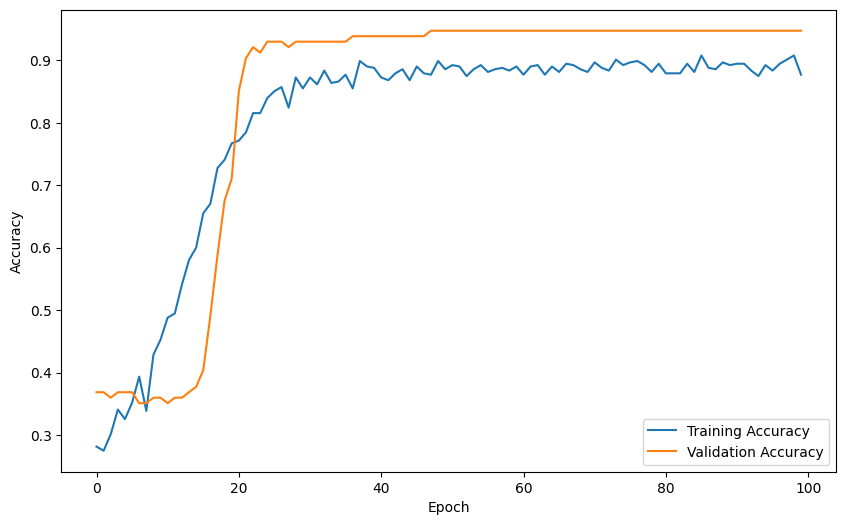

In [ ]:
# Plot the Training and validation in accuracy
plt.figure(figsize=(10, 6))
plt.plot(training_acc, label='Training Accuracy')
plt.plot(validation_acc, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

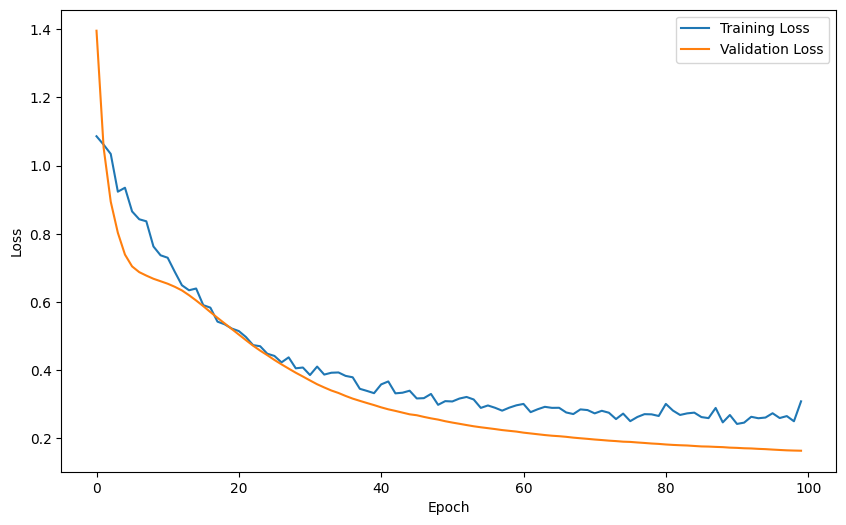

In [ ]:
# plot the training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(training_loss, label='Training Loss')
plt.plot(validation_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt

## Performance Evaluation

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

y_last_pred = []
for i in y_prediction :
  if i > 0.5 :
    y_last_pred.append(1)
  else :
    y_last_pred.append(0)

print(classification_report(y_test,y_last_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        71
           1       1.00      0.86      0.93        43

    accuracy                           0.95       114
   macro avg       0.96      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



Text(95.72222222222221, 0.5, 'Truth')

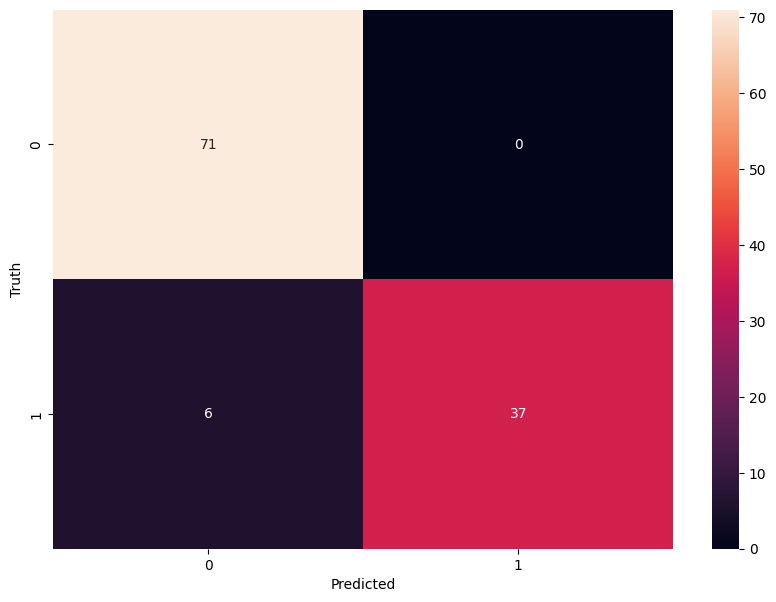

In [ ]:
import seaborn as sn

cm = confusion_matrix(y_test,y_last_pred)
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
#calculate the Accuracy,precision , recall and F1
from sklearn.metrics import accuracy_score , precision_score , recall_score , f1_score

accuracy = accuracy_score(y_test,y_last_pred)
precision = precision_score(y_test,y_last_pred)
recall = recall_score(y_test,y_last_pred)
f1 = f1_score(y_test,y_last_pred)

print(f'Accuracy : {accuracy}')
print(f'Precision : {precision}')
print(f'Recall : {recall}')
print(f'F1 : {f1}')

Accuracy : 0.9473684210526315
Precision : 1.0
Recall : 0.8604651162790697
F1 : 0.925
